In [9]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pandas as pd
import numpy as np
import os

In [7]:
Train_Dir = 'images/train'
Validation_Dir = 'images/validation'

In [8]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    
    for label in os.listdir(dir):
        for image_name in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, image_name))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels


In [10]:
train = pd.DataFrame()
train['image'],train['label'] =  create_dataframe(Train_Dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [11]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [12]:
validation = pd.DataFrame()
validation['image'], validation['label'] = create_dataframe(Validation_Dir)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
from tqdm.notebook import tqdm

In [14]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [21]:
validation_features = extract_features(validation['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [18]:
x_train = train_features/255.0
x_validation = validation_features/255.0

In [1]:
!pip install scikit-learn


In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_validation = le.transform(validation['label'])

In [23]:
y_train = to_categorical(y_train,num_classes = 7)
y_validation = to_categorical(y_validation,num_classes = 7)

In [24]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [25]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [36]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_validation,y_validation)) 

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [39]:
from keras.models import model_from_json

In [43]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [44]:

file_path = "emotiondetector.json"

if os.path.isfile(file_path):
    json_file = open(file_path, "r")
    model_json = json_file.read()
    json_file.close()
else:
    model = model_from_json(model_json)
    model.load_weights("emotiondetector.h5")
    print("The file does not exist.")


In [45]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [51]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [52]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 47ms/step
model prediction is  fear


In [48]:
pip install matplotlib


     ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
     ------- ----------------------------- 30.7/156.8 kB 660.6 kB/s eta 0:00:01
     ------------------- ----------------- 81.9/156.8 kB 919.0 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/156.8 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 156.8/156.8 kB 851.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
    --------------------------------------- 0.1/7.6 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.2/7.6 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.6 MB 1.5 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.6 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/7.6 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.6 MB 1.7 MB/s eta 0:00:05
   --

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 210ms/step
model prediction is  fear


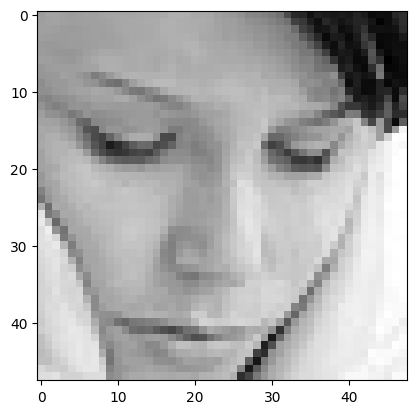

In [50]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [53]:
image = 'images/train/happy/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/happy/42.jpg'

original image is of disgust
1/1 [==============================] - 0s 332ms/step
model prediction is  fear


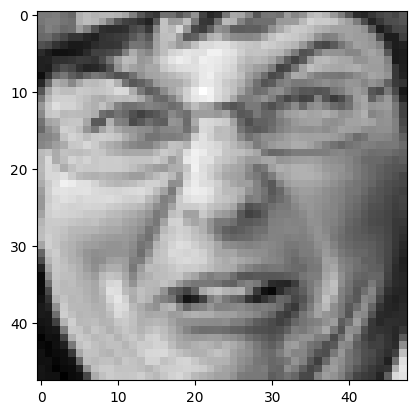

In [54]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 298ms/step
model prediction is  fear


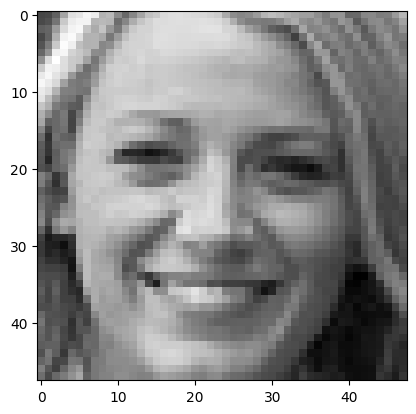

In [55]:
image = 'images/train/happy/324.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [56]:
print("Happy Ending!")

Happy Ending!
